In [74]:
import numpy as np
import pandas as pd
from catboost import CatBoostClassifier, Pool, cv
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
dataset = pd.read_csv('train.csv')
dataset

,obj_source_satation_id,e_power,t_power,boiler_count,turbine_count,obj_consumer_station_id,obj_consumer_id,load_gvs,load_fact,heat_load,...,days_of_work,event_class,year,month,season,day,day_of_week,is_weekend,last_event_class,last_event_days
0,1,1420,3709,23,8,1,2,0.1442,0.3474,0.1678,...,0.0,0.0,2024.0,12.0,1.0,4.0,2.0,0.0,3.0,291.0
1,1,1420,3709,23,8,1,2,0.1442,0.3474,0.1678,...,0.0,0.0,2024.0,12.0,1.0,3.0,1.0,0.0,3.0,290.0
2,1,1420,3709,23,8,1,2,0.1442,0.3474,0.1678,...,0.0,0.0,2024.0,12.0,1.0,2.0,0.0,0.0,3.0,289.0
3,1,1420,3709,23,8,1,2,0.1442,0.3474,0.1678,...,0.0,0.0,2024.0,12.0,1.0,1.0,6.0,1.0,3.0,288.0
4,1,1420,3709,23,8,1,2,0.1442,0.3474,0.1678,...,0.0,0.0,2024.0,11.0,4.0,4.0,0.0,0.0,3.0,261.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1027914,1,1420,3709,23,8,4391,4391,0.1900,0.4180,0.3600,...,0.0,0.0,2023.0,2.0,1.0,11.0,5.0,1.0,0.0,0.0
1027915,1,1420,3709,23,8,4391,4391,0.1900,0.4180,0.3600,...,0.0,0.0,2023.0,2.0,1.0,10.0,4.0,0.0,0.0,0.0
1027916,1,1420,3709,23,8,4391,4391,0.1900,0.4180,0.3600,...,0.0,0.0,2023.0,1.0,1.0,12.0,3.0,0.0,0.0,0.0
1027917,1,1420,3709,23,8,4391,4391,0.1900,0.4180,0.3600,...,0.0,0.0,2023.0,1.0,1.0,11.0,2.0,0.0,0.0,0.0


In [76]:
test_dataset = dataset.copy()[:10000]
train_dataset = dataset.copy()[10000:]

In [77]:

X = train_dataset.drop(columns='event_class').copy()
y = train_dataset['event_class']

In [78]:
x, x_test, y, y_test = train_test_split(X, y, test_size=0.2, random_state=4212)

In [79]:
params_cb = {
        'loss_function': 'MultiClass',
        'eval_metric': 'Accuracy',
        'iterations': 500,
    }
model = CatBoostClassifier(**params_cb)
train_pool = Pool(
        data=x,
        label=y
)
test_pool = Pool(
        data=x_test,
        label=y_test
)
model.fit(
    train_pool,
    eval_set=test_pool,
    verbose=False,
    plot=True,
    use_best_model=True,
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [80]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,errors,18.149338
1,last_event_days,8.566637
2,last_event_class,8.458539
3,month,6.778631
4,day,6.674063
5,location_area_id,4.575403
6,supply_temp,3.752123
7,house_number,3.623474
8,days_of_work,3.612580
9,season,3.155803


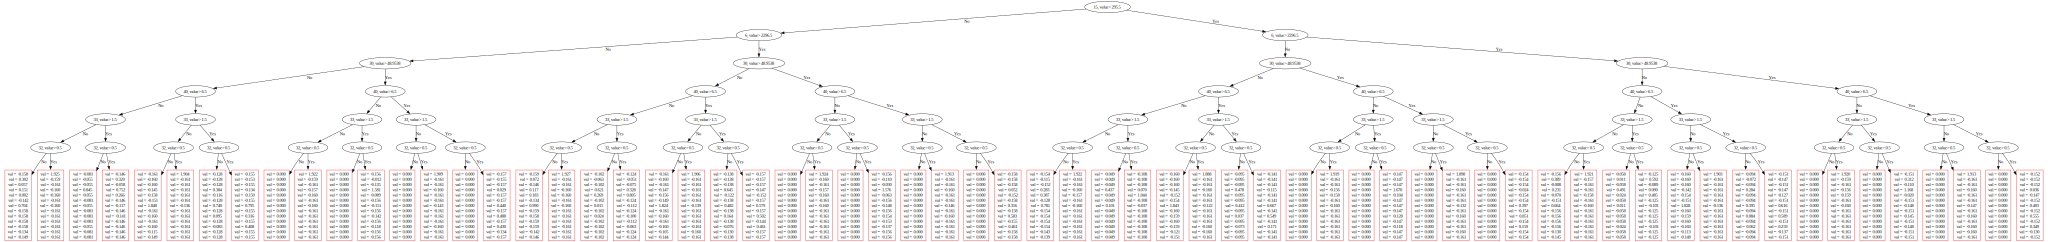

In [81]:
model.plot_tree(
    tree_idx=0,
    # pool=test_pool
)

In [82]:
predict = model.predict(test_dataset.drop(columns='event_class'))
test_dataset['predict_event_class'] = predict
test_dataset[['event_class', 'predict_event_class']]


,event_class,predict_event_class
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
9995,0.0,0.0
9996,0.0,0.0
9997,0.0,0.0
9998,0.0,0.0


In [83]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(test_dataset['event_class'], test_dataset['predict_event_class'])
accuracy

0.9914